<a href="https://colab.research.google.com/github/atusharkm/hello-world/blob/master/FinBTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install lazypredict

     |████████████████████████████████| 1.2 MB 4.8 MB/s 
     |████████████████████████████████| 72 kB 885 kB/s 
     |████████████████████████████████| 127.6 MB 8.0 kB/s 
     |████████████████████████████████| 6.8 MB 23.0 MB/s 
     |████████████████████████████████| 10.1 MB 44.6 MB/s 
     |████████████████████████████████| 25.9 MB 1.0 kB/s 
     |████████████████████████████████| 14.5 MB 8.1 kB/s 
     |████████████████████████████████| 248 kB 59.3 MB/s 
     |████████████████████████████████| 269 kB 70.1 MB/s 
     |████████████████████████████████| 302 kB 61.8 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44635 sha256=c0c4a9dd89ed38000fec7044df32bfe2ab08a2d22464d54e7aa16244b20effcd
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully u

In [1]:
import lazypredict

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df=pd.read_csv('Nu Data BTP - Sheet2.csv')

In [5]:
df.head()

,TF,Re,TL_OUT,TU_OUT,Tb,Tb_max,PL_in,PL_out,PU_in,PU_out,hi,wc,ho,Dhi,Dho,Dh_m,vin,del_PL,del_PU,del_p,Rth,T_mean,h_mean,f,Nu
0,0.26,200,297.44,295.19,302.45,303.53,41208.00,216.97,41208.00,215.59,833.33,100,216.67,178.57,136.84,157.71,1.13,40991.03,40992.41,40991.72,0.10,294.73,129575.64,0.26,34.06
1,0.28,200,297.49,295.22,302.50,303.58,38459.00,189.69,38458.00,188.56,820.31,100,229.69,178.27,139.34,158.80,1.13,38269.31,38269.44,38269.38,0.10,294.75,129073.89,0.24,34.16
2,0.30,200,297.55,295.25,302.54,303.63,36143.00,167.35,36143.00,167.49,807.69,100,242.31,177.97,141.57,159.77,1.13,35975.65,35975.51,35975.58,0.10,294.77,128783.00,0.23,34.29
3,0.32,200,297.60,295.29,302.59,303.68,34168.00,148.95,34167.00,149.05,795.45,100,254.55,177.66,143.59,160.63,1.13,34019.05,34017.95,34018.50,0.11,294.80,128328.52,0.21,34.36
4,0.34,200,297.65,295.32,302.63,303.72,32462.00,133.97,32461.00,133.73,783.58,100,266.42,177.36,145.42,161.39,1.13,32328.03,32327.27,32327.65,0.11,294.82,128000.00,0.20,34.43


In [6]:
df.describe()

,TF,Re,TL_OUT,TU_OUT,Tb,Tb_max,PL_in,PL_out,PU_in,PU_out,hi,wc,ho,Dhi,Dho,Dh_m,vin,del_PL,del_PU,del_p,Rth,T_mean,h_mean,f,Nu
count,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00
mean,0.68,325.81,303.12,300.61,309.43,312.06,44912.68,198.75,44912.42,198.45,640.37,100.00,409.63,172.53,159.01,165.77,1.89,44720.94,44721.93,44721.44,0.19,297.51,122552.68,0.25,33.79
std,0.24,190.58,18.94,17.83,24.05,29.23,37543.51,278.58,37543.45,278.02,98.66,0.00,98.66,3.46,9.18,2.94,1.10,37298.08,37301.72,37299.90,0.29,9.19,35445.34,0.48,9.64
min,0.26,10.00,295.04,293.81,300.09,300.89,774.81,0.79,774.81,0.79,525.00,100.00,216.67,168.00,136.84,157.71,0.06,774.02,774.02,774.02,0.08,293.79,14233.47,0.03,3.99
25%,0.44,200.00,295.83,294.20,301.03,302.04,17133.03,32.40,17133.00,32.42,558.51,100.00,320.83,169.63,152.48,164.18,1.14,17100.63,17100.58,17100.61,0.09,294.08,120123.86,0.06,33.61
50%,0.76,300.00,296.64,294.68,301.82,302.88,37655.00,101.88,37654.00,101.29,596.59,100.00,453.41,171.29,163.86,167.57,1.78,37533.75,37532.61,37533.18,0.10,294.40,134803.89,0.10,36.97
75%,0.88,500.00,298.76,296.09,303.61,304.87,60771.29,235.04,60770.60,234.61,729.17,100.00,491.49,175.88,166.19,167.91,2.87,60523.45,60522.79,60523.12,0.12,295.29,144041.52,0.18,39.64
max,1.00,600.00,375.72,369.71,403.19,425.64,193000.00,1765.50,193000.00,1759.90,833.33,100.00,525.00,178.57,168.00,168.00,3.59,191454.50,191530.10,191492.30,1.32,332.93,158667.20,2.14,42.02


In [7]:
corr=df.corr()

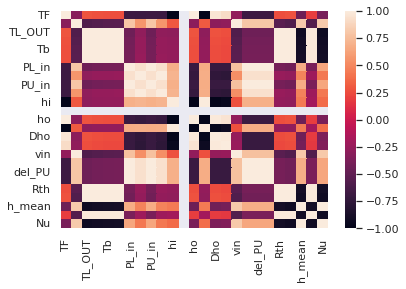

In [8]:
sns.set()
sns.heatmap(corr)

In [9]:
print(corr)

          TF    Re  TL_OUT  TU_OUT    Tb  ...   Rth  T_mean  h_mean     f    Nu
TF      1.00 -0.31    0.29    0.27  0.26  ...  0.26    0.28   -0.44  0.19 -0.38
Re     -0.31  1.00   -0.59   -0.56 -0.54  ... -0.54   -0.57    0.82 -0.57  0.82
TL_OUT  0.29 -0.59    1.00    1.00  1.00  ...  1.00    1.00   -0.92  0.99 -0.93
TU_OUT  0.27 -0.56    1.00    1.00  1.00  ...  1.00    1.00   -0.90  0.99 -0.91
Tb      0.26 -0.54    1.00    1.00  1.00  ...  1.00    1.00   -0.89  0.99 -0.90
Tb_max  0.26 -0.54    1.00    1.00  1.00  ...  1.00    1.00   -0.89  0.99 -0.90
PL_in  -0.67  0.80   -0.43   -0.41 -0.40  ... -0.40   -0.42    0.68 -0.38  0.64
PL_out -0.68  0.57   -0.27   -0.25 -0.25  ... -0.25   -0.26    0.48 -0.22  0.43
PU_in  -0.67  0.80   -0.43   -0.41 -0.40  ... -0.40   -0.42    0.68 -0.38  0.64
PU_out -0.68  0.57   -0.27   -0.25 -0.25  ... -0.25   -0.26    0.48 -0.22  0.43
hi     -0.99  0.30   -0.29   -0.27 -0.26  ... -0.26   -0.28    0.44 -0.19  0.38
wc       nan   nan     nan     nan   nan

In [10]:
X = df[df.columns[range(23)]]
y=df['Nu']
z=df['f']

In [11]:
print(X)

      TF   Re  TL_OUT  TU_OUT     Tb  ...   del_PU    del_p  Rth  T_mean    h_mean
0   0.26  200  297.44  295.19 302.45  ... 40992.41 40991.72 0.10  294.73 129575.64
1   0.28  200  297.49  295.22 302.50  ... 38269.44 38269.38 0.10  294.75 129073.89
2   0.30  200  297.55  295.25 302.54  ... 35975.51 35975.58 0.10  294.77 128783.00
3   0.32  200  297.60  295.29 302.59  ... 34017.95 34018.50 0.11  294.80 128328.52
4   0.34  200  297.65  295.32 302.63  ... 32327.27 32327.65 0.11  294.82 128000.00
..   ...  ...     ...     ...    ...  ...      ...      ...  ...     ...       ...
186 0.82  200  298.66  296.02 303.53  ... 17682.60 17682.58 0.12  295.25 120694.79
187 0.82  300  297.25  295.06 302.38  ... 27277.70 27277.70 0.10  294.65 129409.98
188 0.82  400  296.50  294.59 301.71  ... 37372.16 37372.14 0.10  294.35 135827.87
189 0.82  500  296.02  294.31 301.24  ... 47963.45 47963.51 0.09  294.16 141137.73
190 0.82  600  295.69  294.12 300.89  ... 59041.63 59041.62 0.09  294.03 145740.29

[19

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.15,random_state =56)

reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:02<00:00, 15.88it/s]

                               Adjusted R-Squared  ...  Time Taken
Model                                              ...            
RANSACRegressor                              1.00  ...        0.02
LinearRegression                             1.00  ...        0.02
TransformedTargetRegressor                   1.00  ...        0.01
BayesianRidge                                1.00  ...        0.01
LassoLarsCV                                  1.00  ...        0.07
HuberRegressor                               1.00  ...        0.05
OrthogonalMatchingPursuitCV                  1.00  ...        0.02
LinearSVR                                    1.00  ...        0.03
LassoCV                                      1.00  ...        0.09
RidgeCV                                      1.00  ...        0.02
ExtraTreesRegressor                          1.00  ...        0.18
OrthogonalMatchingPursuit                    1.00  ...        0.02
PassiveAggressiveRegressor                   1.00  ...        

In [13]:
print(predictions)

    AdaBoostRegressor  BaggingRegressor  ...  XGBRegressor  LGBMRegressor
0               36.38             36.14  ...         36.11          36.36
1               38.44             38.91  ...         38.94          38.87
2               40.07             39.64  ...         39.32          40.22
3               40.07             39.79  ...         39.32          40.22
4               33.79             34.45  ...         34.44          34.10
5               38.44             38.91  ...         38.93          38.96
6               36.38             36.30  ...         36.44          36.43
7               40.39             40.49  ...         40.50          40.49
8               36.79             37.17  ...         36.50          36.98
9               34.62             35.08  ...         34.18          33.69
10              40.07             40.33  ...         40.33          39.74
11              40.62             40.64  ...         40.70          40.85
12              33.75             33.3

In [14]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RANSACRegressor,1.00,1.00,0.01,0.02
LinearRegression,1.00,1.00,0.01,0.02
TransformedTargetRegressor,1.00,1.00,0.01,0.01
BayesianRidge,1.00,1.00,0.01,0.01
LassoLarsCV,1.00,1.00,0.02,0.07
HuberRegressor,1.00,1.00,0.02,0.05
OrthogonalMatchingPursuitCV,1.00,1.00,0.02,0.02
LinearSVR,1.00,1.00,0.02,0.03
LassoCV,1.00,1.00,0.03,0.09


In [ ]:
#Lazy Regression Completed

In [ ]:
#Feature Selection and Importance

In [15]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_importance

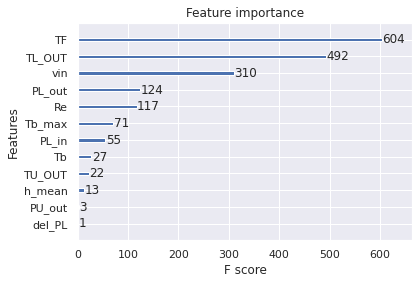

In [16]:
# fit model no training data
model = XGBRegressor()
model.fit(X, y)

# plot feature importance
plot_importance(model)
plt.show()

In [17]:
new_df=pd.read_csv('Nu Data BTP - TestSet1SmallValues.csv')

In [18]:
new_df.head()

,TF,Re,TL_OUT,TU_OUT,Tb,Tb_max,PL_in,PL_out,PU_in,PU_out,hi,wc,ho,Dhi,Dho,Dh_m,vin,del_PL,del_PU,del_p,Rth,T_mean,h_mean,f,Nu
0,0.26,200,297.44,295.19,302.45,303.53,41208.00,216.97,41208.00,215.59,833.33,100,216.67,178.57,136.84,157.71,1.13,40991.03,40992.41,40991.72,0.10,294.73,129575.64,0.26,34.06
1,0.28,200,297.49,295.22,302.50,303.58,38459.00,189.69,38458.00,188.56,820.31,100,229.69,178.27,139.34,158.80,1.13,38269.31,38269.44,38269.38,0.10,294.75,129073.89,0.24,34.16
2,0.30,200,297.55,295.25,302.54,303.63,36143.00,167.35,36143.00,167.49,807.69,100,242.31,177.97,141.57,159.77,1.13,35975.65,35975.51,35975.58,0.10,294.77,128783.00,0.23,34.29
3,0.32,200,297.60,295.29,302.59,303.68,34168.00,148.95,34167.00,149.05,795.45,100,254.55,177.66,143.59,160.63,1.13,34019.05,34017.95,34018.50,0.11,294.80,128328.52,0.21,34.36
4,0.34,200,297.65,295.32,302.63,303.72,32462.00,133.97,32461.00,133.73,783.58,100,266.42,177.36,145.42,161.39,1.13,32328.03,32327.27,32327.65,0.11,294.82,128000.00,0.20,34.43


In [19]:
X_new = new_df[new_df.columns[range(23)]]
y_new = new_df['Nu']
z_new = new_df['f']

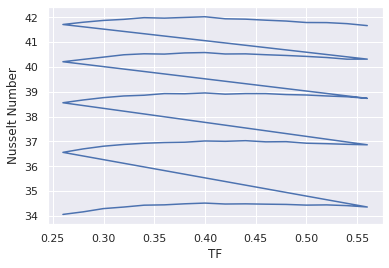

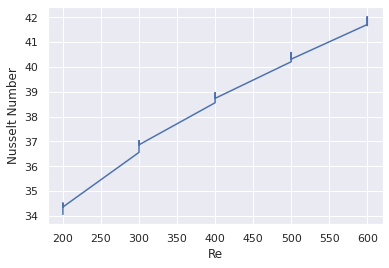

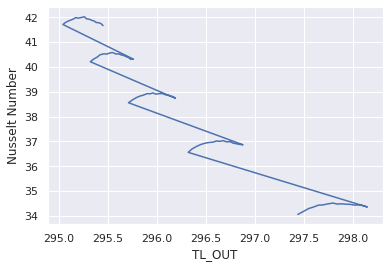

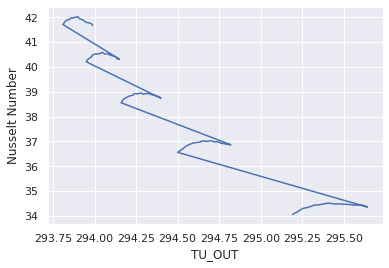

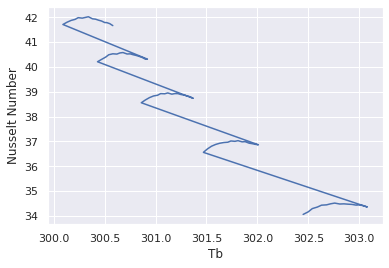

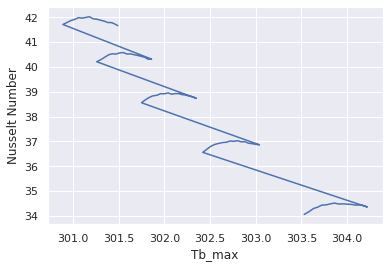

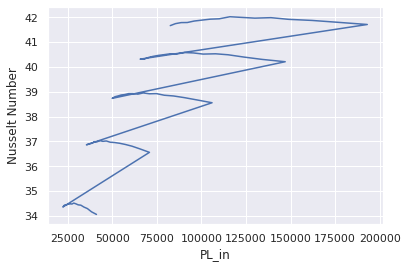

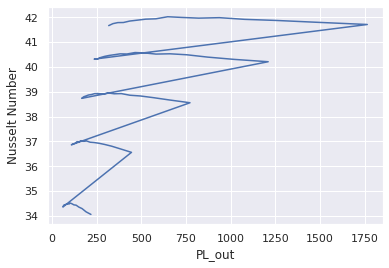

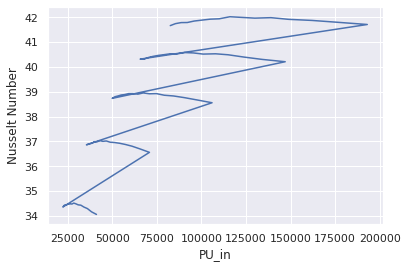

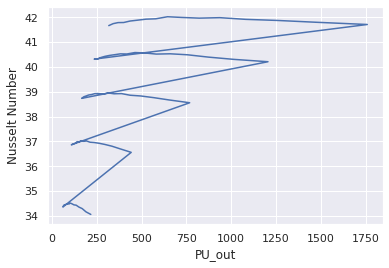

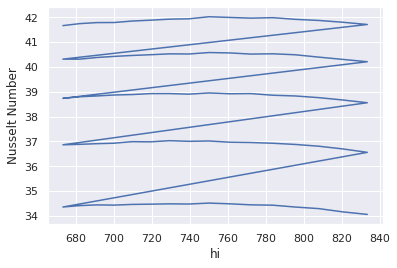

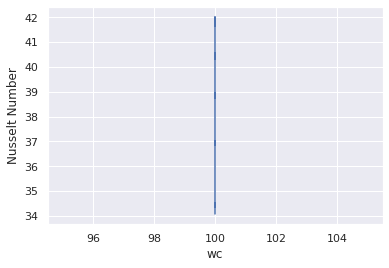

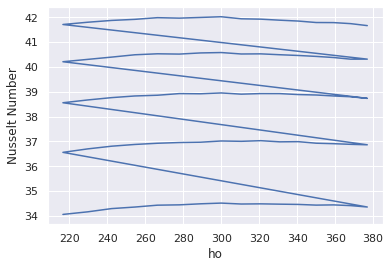

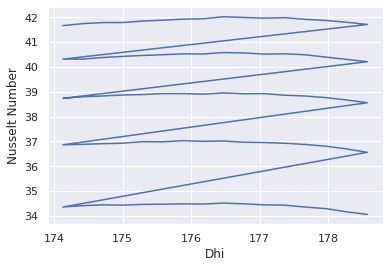

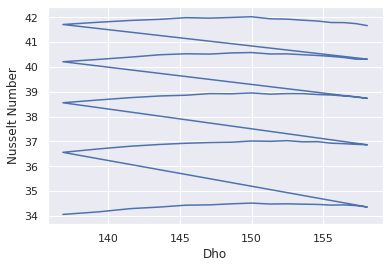

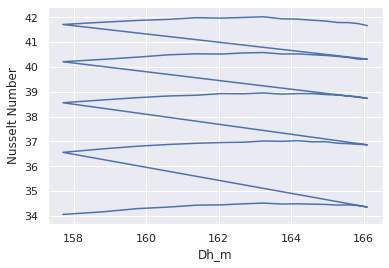

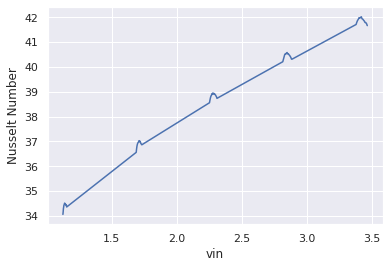

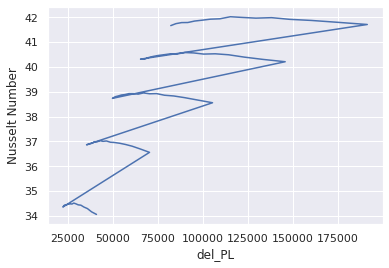

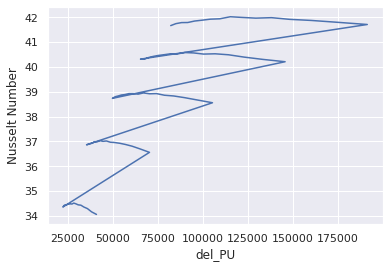

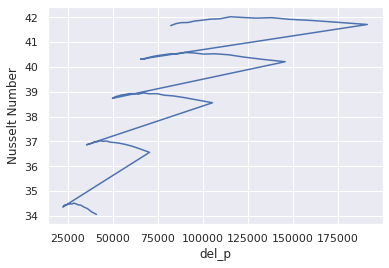

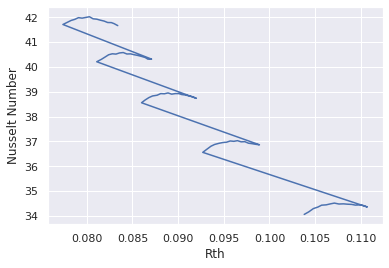

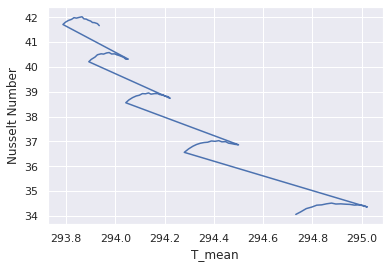

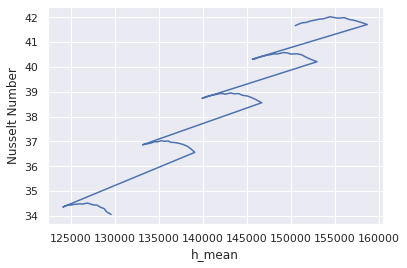

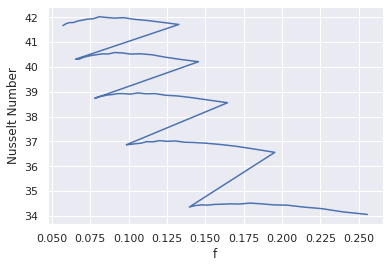

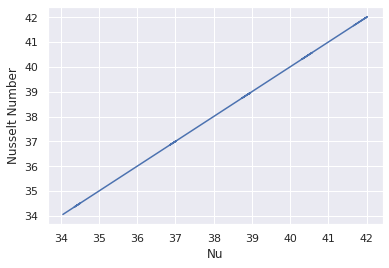

In [20]:
for i in new_df.columns:
      plt.figure()
      plt.plot(new_df[i], y_new)
      plt.xlabel(i)
      plt.ylabel("Nusselt Number")

In [ ]:
#Basic Correlations and Mappings completed, Feature Importance determined

In [ ]:
#Using Random Forest Regression Model

In [21]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
#Testing the results on test data set

In [23]:
# Use the RFR predict method on the test data
predictions = rf.predict(X_test)


# Calculate the absolute errors
errors = abs(predictions - y_test)

In [24]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.1


In [25]:
for i in predictions:
  print(i)

36.16080616295988
38.92914944409018
39.85348009046
39.901830825240005
34.44806142847005
38.902297333699615
36.33040605996971
40.512365597430296
36.892970944809676
35.24438582458971
40.3779211773697
40.62740349192065
33.34928277862992
38.92977759278985
37.576068434579966
38.88064208748969
39.37157261179996
34.42112908651011
37.57985479450997
37.603079324730054
38.89403674103004
39.56847712407995
28.778704113119602
34.47426727963023
40.50255304753003
34.49052352044986
38.825980974930026
21.46415349339998
28.311520945679696


In [ ]:
for e in errors:
  print(e)

0.02602104704011765
0.013824874090175854
0.24677053953999462
0.2646325247599961
0.015191058470044538
0.020728326300385902
0.07824251003028593
0.010236462569700677
0.1968710948096728
1.18612712458971
0.06802318736969681
0.052147708079353094
0.010883411370080864
0.029688972789848833
0.15542025457996544
0.04124402251031256
0.026488338200039152
0.008991463489884666
0.10037814450996763
0.0022030652699456255
0.026448898969960055
0.03355846592005207
0.033129016880398154
0.009522310369767695
0.08245576753002837
0.004987880449860427
0.0010573650699754467
0.05380438660002085
0.018389515679697155


In [26]:
#Predictiing the results for new data
# Use the RFR predict method on the test data
predictions = rf.predict(X_new)


# Calculate the absolute errors
errors = abs(predictions - y_new)

In [30]:
predictions.size

80

In [31]:
for i in predictions:
  print(i)

35.24438582458971
34.59860951981957
34.42726456642984
34.38662831225006
34.42112908651011
34.460889431650045
34.49052352044986
34.498826358229806
34.48620370255006
34.47426727963023
34.46954740207029
34.46147423719023
34.44806142847005
34.430348685100086
34.40639149599047
34.37997160864038
36.8663397013796
36.892970944809676
36.88821569237991
36.90335041442027
36.932502494500085
36.954435827069844
36.97223030130976
37.00456307408981
37.006005409809404
37.01252171676953
36.98633935768966
36.975154609049945
36.92988199017986
36.90773650432997
36.88585724559992
36.88407499029966
38.95837062766028
38.88743094822981
38.86201273926023
38.84149003058008
38.87131350857
38.910071076550295
38.92914944409018
38.93263606386003
38.92977759278985
38.902297333699615
38.88064208748969
38.869898410639664
38.86053978227031
38.825980974930026
38.802623546499895
38.7891990660604
40.60904904457985
40.48398585841982
40.47215093067944
40.50544818110944
40.5235549117699
40.52314599150977
40.55423390810008
40.

In [ ]:
#Big Values TF near 1

In [32]:
n_df=pd.read_csv('Nu Data BTP - TestSet2BigValues.csv')

In [33]:
X_n = n_df[n_df.columns[range(23)]]
y_n = n_df['Nu']
z_n = n_df['f']

In [35]:
#Predictiing the results for new data
# Use the RFR predict method on the test data
n_predictions = rf.predict(X_n)


# Calculate the absolute errors
n_errors = abs(n_predictions - y_n)

In [36]:
for i in n_predictions:
  print(i)

20.461823986380104
28.298017106679712
33.30811540682029
35.51105614283017
37.576068434579966
38.87801275013998
39.85348009046
4.00555692481296
20.515321173870145
28.311520945679696
33.31921604939008
35.670320141990196
37.57985479450997
38.89403674103004
39.901830825240005
4.0202459115779545
20.60432002555003
28.386380910529546
33.34928277862992
35.76803029492987
37.58901337848995
38.993853662490515
40.16339148880013
4.052855821730961
20.715829489399813
28.438774213979418
33.42761767688965
35.833907257169955
37.603079324730054
39.05597405746016
40.28245616860993
4.088180020241027
20.82037970417998
28.506993570129485
33.46912217484961
35.88879949823016
37.678332378130335
39.11205472187012
40.35640929861051
4.125101072062031
20.93863195540002
28.582691322260242
33.52356072361007
35.94370787708994
37.729612112139876
39.183406408239826
40.42670090459041
4.164183562469961
21.04951877113991
28.652998061260288
33.57404617928015
35.99895502725974
37.783740787439996
39.24718147710977
40.50205370

In [ ]:
#Analyzing the obtained results

In [37]:
#Comparing the results of predictions and n_predictions
nsmall_pred=predictions
nsmall_err=errors

nbig_pred=n_predictions
nbig_err=n_errors

In [38]:
nsmall_df=pd.DataFrame(nsmall_pred)
nsmall_df.describe()

,0
count,80.00
mean,38.53
std,2.61
min,34.38
25%,36.89
50%,38.88
75%,40.53
max,41.99


In [39]:
print(nsmall_pred)

[35.24438582 34.59860952 34.42726457 34.38662831 34.42112909 34.46088943
 34.49052352 34.49882636 34.4862037  34.47426728 34.4695474  34.46147424
 34.44806143 34.43034869 34.4063915  34.37997161 36.8663397  36.89297094
 36.88821569 36.90335041 36.93250249 36.95443583 36.9722303  37.00456307
 37.00600541 37.01252172 36.98633936 36.97515461 36.92988199 36.9077365
 36.88585725 36.88407499 38.95837063 38.88743095 38.86201274 38.84149003
 38.87131351 38.91007108 38.92914944 38.93263606 38.92977759 38.90229733
 38.88064209 38.86989841 38.86053978 38.82598097 38.80262355 38.78919907
 40.60904904 40.48398586 40.47215093 40.50544818 40.52355491 40.52314599
 40.55423391 40.56065071 40.53667774 40.5123656  40.50641054 40.50037214
 40.50255305 40.44482543 40.38979783 40.37792118 41.69735726 41.7838775
 41.8599506  41.91397106 41.96201353 41.96848407 41.98679697 41.99349889
 41.93984226 41.90459727 41.86292882 41.81219639 41.71758287 41.66104907
 41.59925042 41.52315628]


In [41]:
#MaxValue obtained at
#0.4	600	295.26	293.9	300.34	301.18	1.16E+05	647.32	1.16E+05	644.17	750	100	300	176.4705882	150	163.2352941	3.416349429	115392.68	115405.83	115399.255	0.0803	293.865	154440.1544	0.080843469	42.01680672